# Part I


In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## Phase 1:
### Exploratory Data Analysis:

In [401]:
df = pd.read_csv('Spaceship data.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Missing values**

In [403]:
def print_nulls_info(df = df):
    table = PrettyTable()

    table.field_names = ['Column Name', 'Data Type', 'Null Count']
    for column in df.columns:
        data_type = str(df[column].dtype)
        null_count = df[column].isna().sum()
        table.add_row([column, data_type, null_count])
    print(table)

print_nulls_info()

+--------------+-----------+------------+
| Column Name  | Data Type | Null Count |
+--------------+-----------+------------+
| PassengerId  |   object  |     0      |
|  HomePlanet  |   object  |    201     |
|  CryoSleep   |   object  |    217     |
|    Cabin     |   object  |    199     |
| Destination  |   object  |    182     |
|     Age      |  float64  |    179     |
|     VIP      |   object  |    203     |
| RoomService  |  float64  |    181     |
|  FoodCourt   |  float64  |    183     |
| ShoppingMall |  float64  |    208     |
|     Spa      |  float64  |    183     |
|    VRDeck    |  float64  |    188     |
|     Name     |   object  |    200     |
| Transported  |    bool   |     0      |
+--------------+-----------+------------+


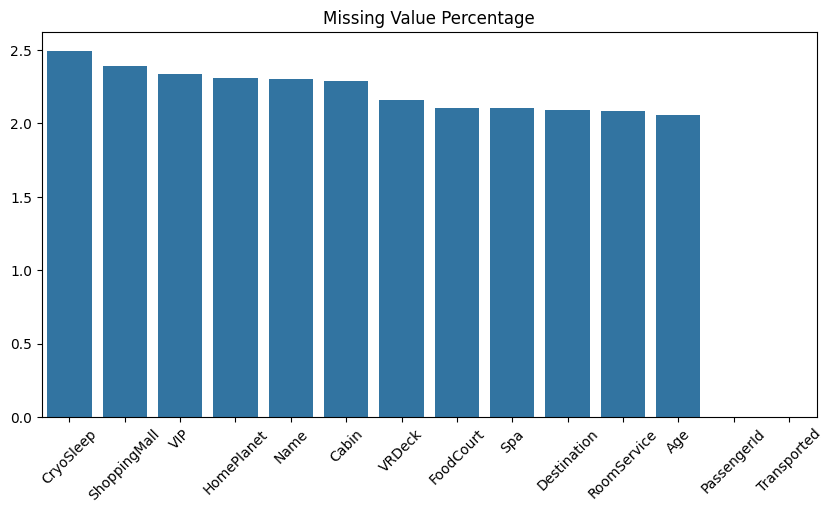

In [404]:
# Missing value visualization
missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values*100)
plt.xticks(rotation=45)
plt.title("Missing Value Percentage")
plt.xlabel("")
plt.show()

We can see that almost every feature has a missing value.

**Data types**

In [405]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [406]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

There are 6 continuous features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features.

We will need to transform the categorical and descriptive features to numeric so we can train ML models.

## EDA

### Target Analysis:

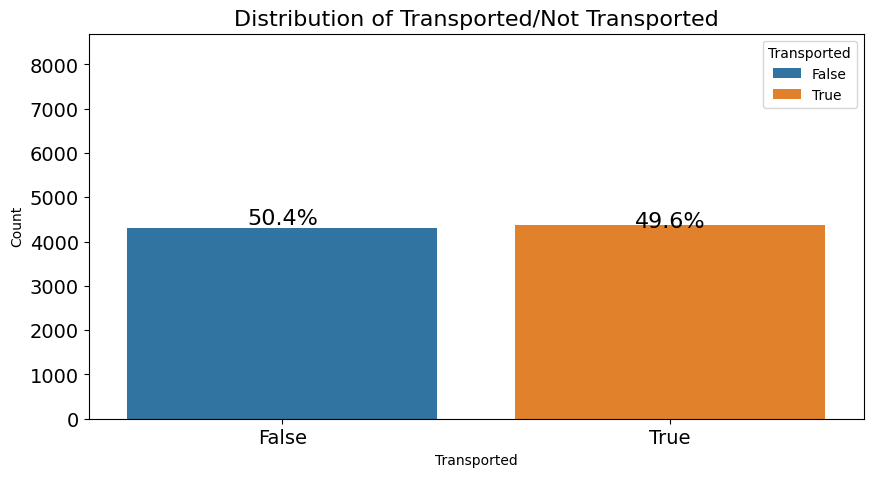

In [407]:
# Counts and proportions
counts = df['Transported'].value_counts()
proportions = df['Transported'].value_counts(normalize=True)

proportions_str = [f'{p:.1%}' for p in proportions]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Transported', data=df, hue='Transported')
plt.title('Distribution of Transported/Not Transported', fontsize=16)
plt.xlabel('Transported')
plt.ylabel('Count')

plt.ylim(0, len(df))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate percentages
for i, count in enumerate(counts):
    plt.text(i, count, proportions_str[i], ha='center', fontsize=16)

plt.show()


The **`Transported`** column is what we want to predict. As we can see there are about the same number of people who Transporned/Non-Transported.

***
### Feature Analysis:

**Continuous features**

Text(0.5, 0, 'Age (years)')

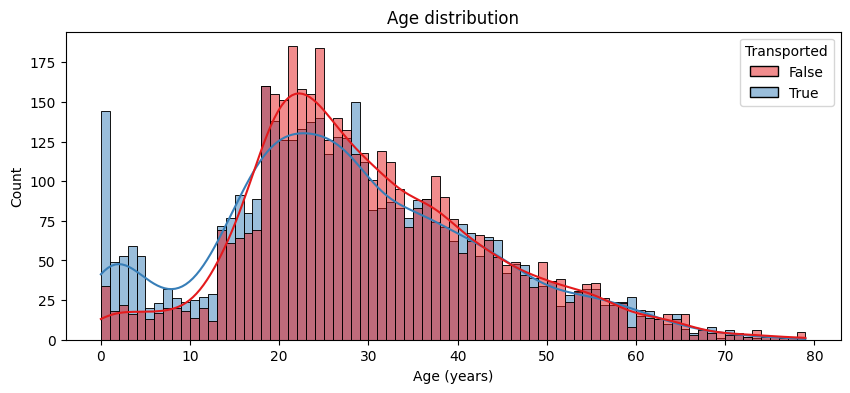

In [408]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True, palette="Set1")

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

We noticed theres a separation between ages.
* 0-18 years-olds were more likely to be transported
* 18-40 were less likely to be transported.
* 40+ were equally likely to be transported.

We will probably create age group feature later because of those insights. 

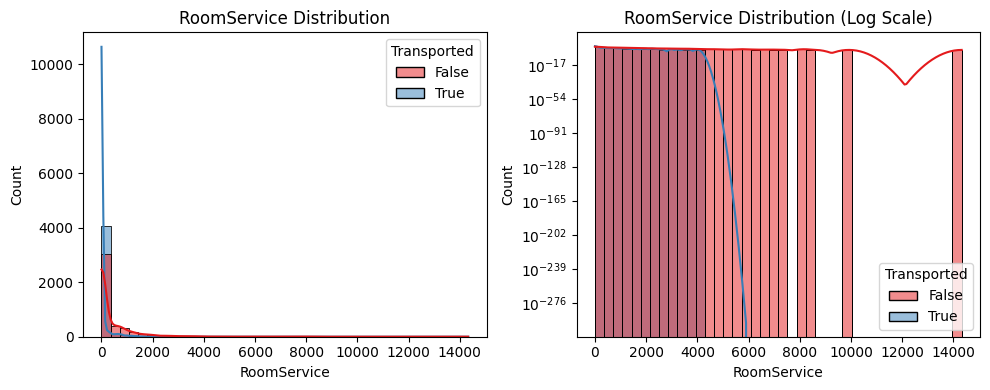

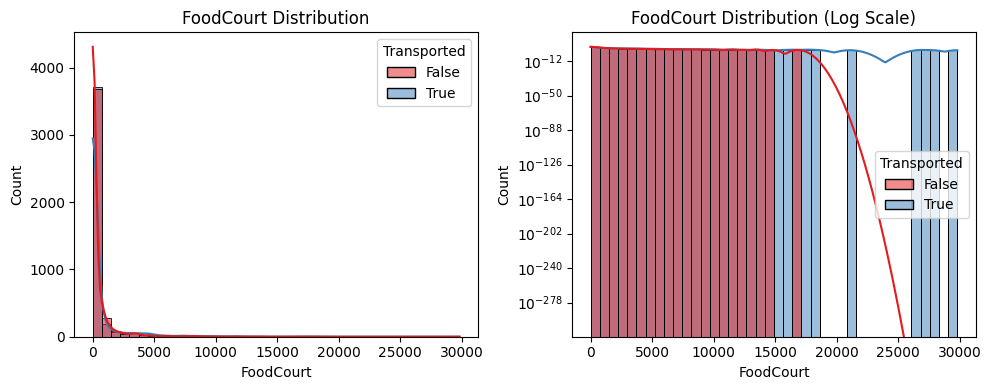

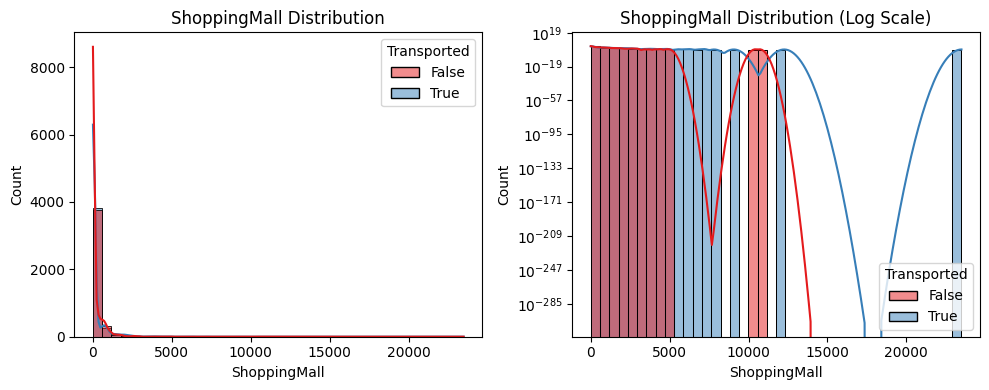

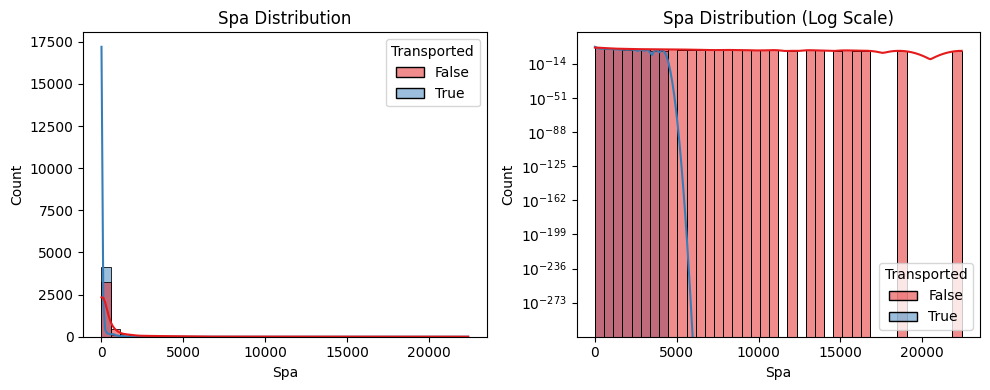

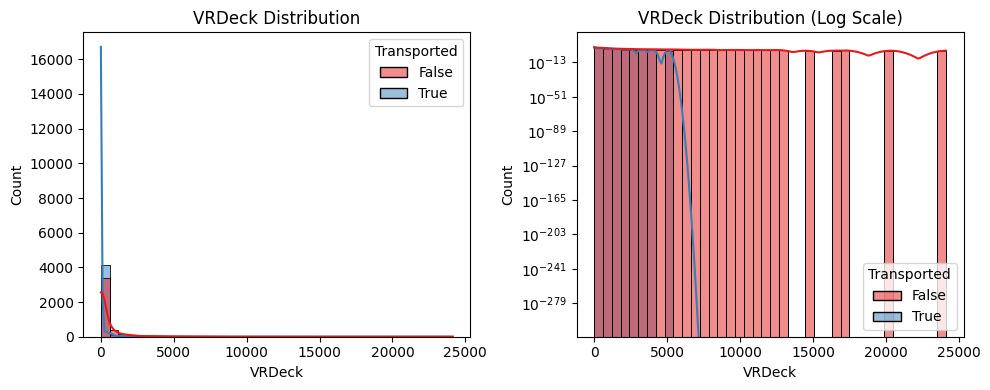

In [409]:
continuous_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in continuous_cols:
    if col == "Age":
        continue

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(col + " Distribution")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    plt.title(col + " Distribution (Log Scale)")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

We limited y axis to zoom in on the plot. 

* The plots shows mostly 0 meaning most people didnt spend money. There is a small number of outlier which spent a lot of money.
* Passengers who spent money had less chance of being transported, especially those who spent in RoomService, Spa and VRDeck


We will create a feature which will aggregate all 5 expenses.





**Categorical Analysis**

In [410]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

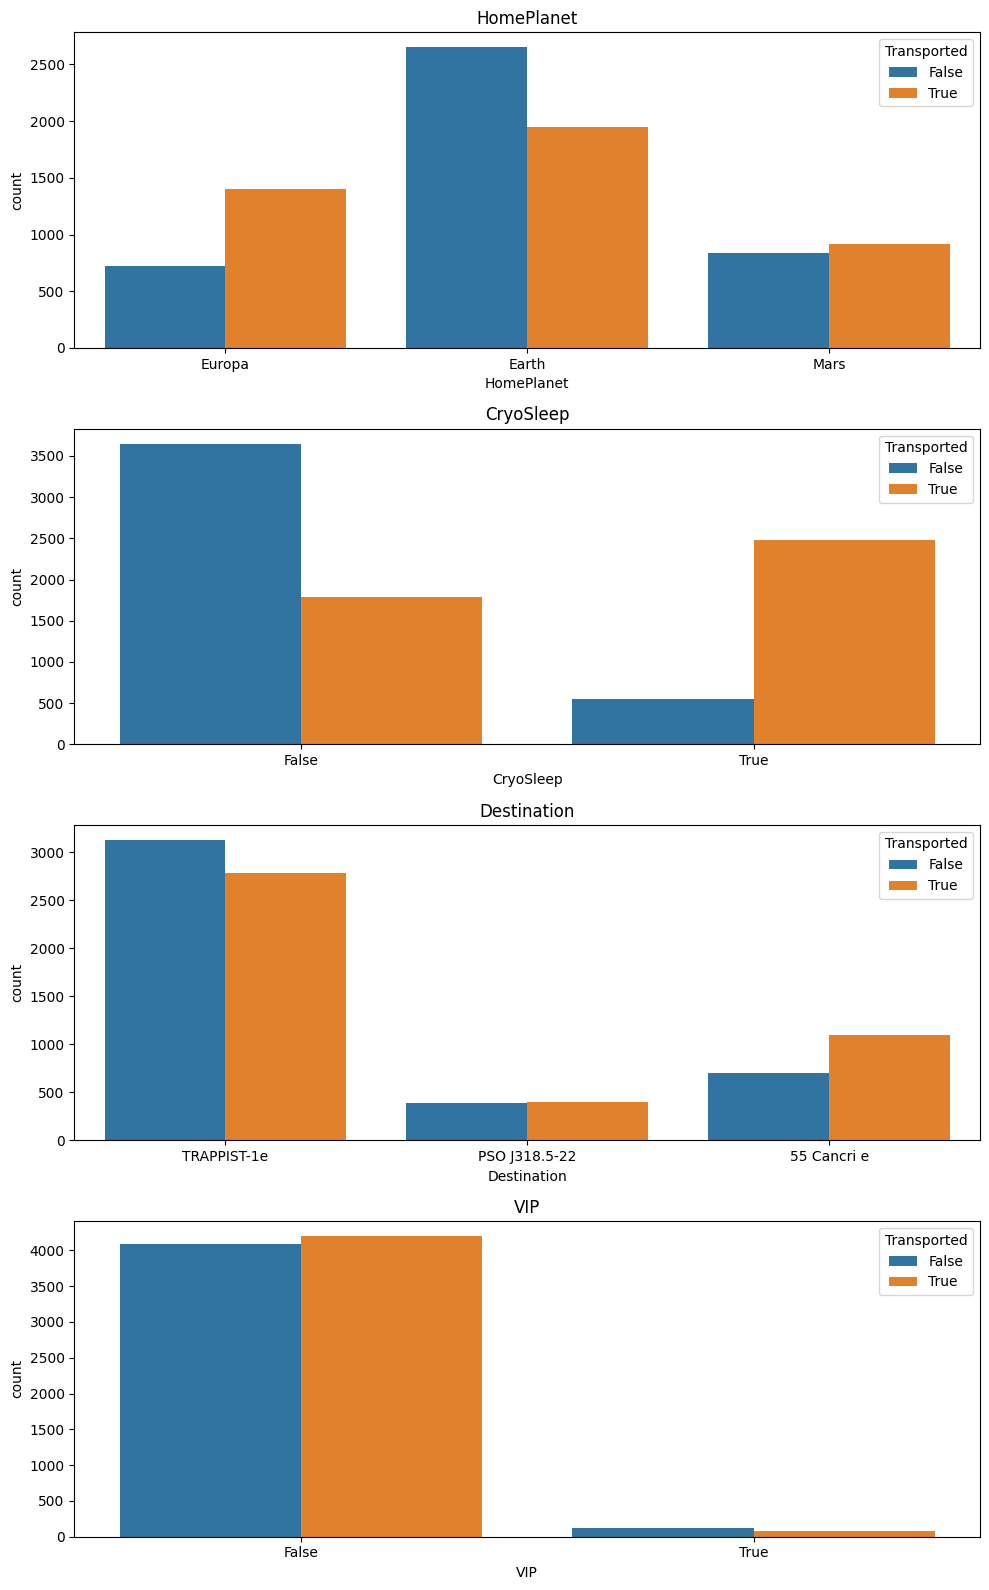

In [411]:
target = 'Transported'

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Consider drop the VIP feature because it doesn't help to predict Transported/not.

The analysis indicates that CryoSleep is strongly associated with the target variable, while HomePlanet and Destination show moderate effects.


***

## Phase 2:
### Data Prepping:

* We want to extract passengers group to learn group sizes.
* We want to extract deck cabin number and side from cabin.
* We want to extract surnames to identify families.

In [412]:
# Extract PassengerGroup from PassengerId
df['PassengerGroup'] = df['PassengerId'].str.split('_').str[0]

# Compute group size
group_sizes = df['PassengerGroup'].value_counts()
df['GroupSize'] = df['PassengerGroup'].map(group_sizes)

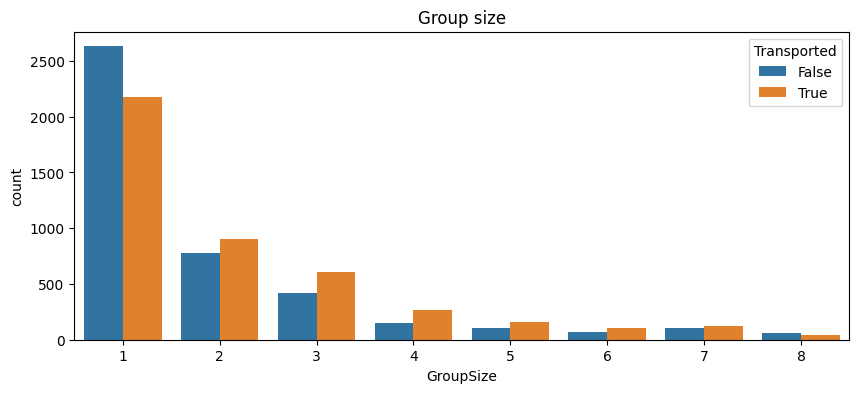

In [413]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='GroupSize', hue='Transported')
plt.title('Group size')
plt.show()

Theres separation between solo passengers and groups. Solo passengers are less likely to be transported then groups.

We will create binary feature Solo, to track which passenger is traveling solo.

In [414]:
df['Solo'] = df['GroupSize'] == 1

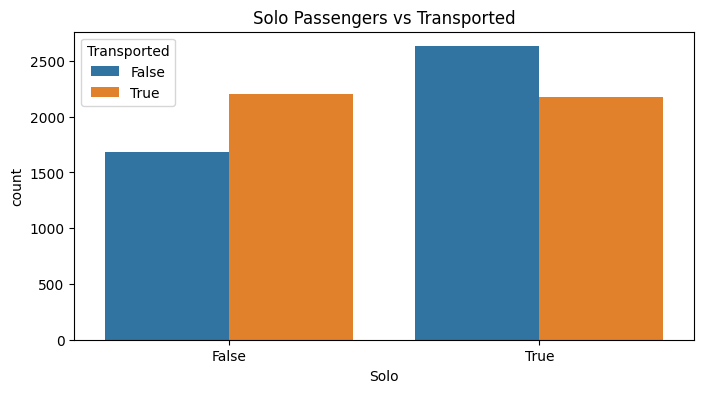

In [415]:
# Solos vs Transported
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Solo', hue='Transported')
plt.title('Solo Passengers vs Transported')
plt.show()

**Spendings**

Creating TotalSpent and NoSpendings features.

In [416]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df['TotalSpent'] = df[spending_cols].sum(axis=1)
df['NoSpendings'] = df['TotalSpent'] == 0

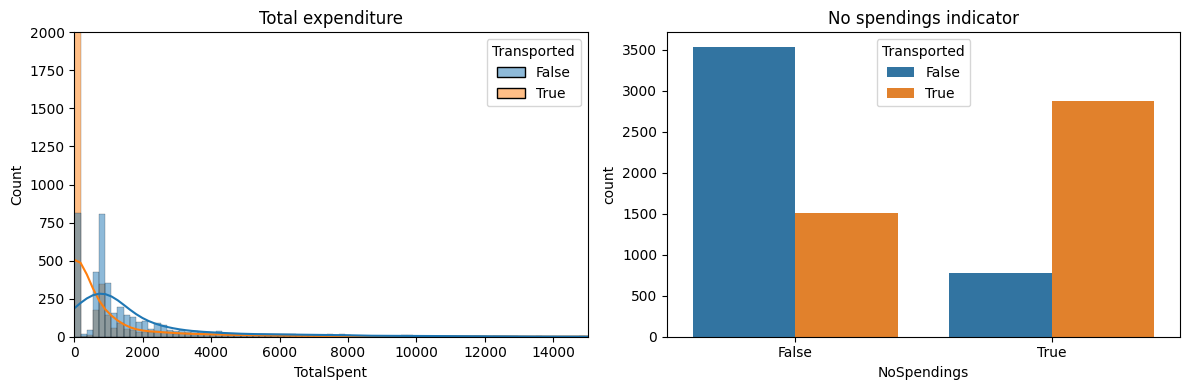

In [417]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='TotalSpent', hue='Transported', bins=200, kde=True)
plt.title('Total expenditure')
plt.ylim([0,2000])
plt.xlim([0,15000])

plt.subplot(1,2,2)
sns.countplot(data=df, x='NoSpendings', hue='Transported')
plt.title('No spendings indicator')
fig.tight_layout()

Now it's very clear - passengers who didn't spent money were more likely to be transported.

**Age Groups**

We now divde passengers to age groups, this will later help us fill in missing features.

In [418]:
df['Age_group']=np.nan
df.loc[df['Age']<=12,'Age_group']='Age_0-12'
df.loc[(df['Age']>13) & (df['Age']<17),'Age_group']='Age_13-17'
df.loc[(df['Age']>=18) & (df['Age']<=25),'Age_group']='Age_18-25'
df.loc[(df['Age']>26) & (df['Age']<=30),'Age_group']='Age_26-30'
df.loc[(df['Age']>31) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>51,'Age_group']='Age_51+'

C:\Users\Yuval\AppData\Local\Temp\ipykernel_17012\3801455233.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age']<=12,'Age_group']='Age_0-12'


we decided on those age groups beacuse we saw that divison in other notebooks, and how well it worked with this division.

Text(0.5, 1.0, 'Age group distribution')

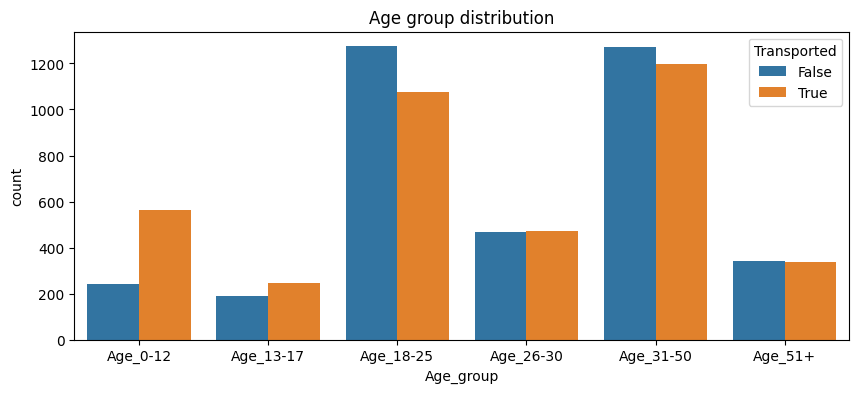

In [419]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

**Cabin**

We will now extract deck, cabin number and side from cabin.

In [420]:
# Replace NaN's with outliers for now (so we can split feature)
df['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
df['Cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0]).astype
df['Cabin_number'] = df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df['Cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
df.loc[df['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
df.loc[df['Cabin_number']==9999, 'Cabin_number']=np.nan
df.loc[df['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
df.drop('Cabin', axis=1, inplace=True)


C:\Users\Yuval\AppData\Local\Temp\ipykernel_17012\1387873616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Z/9999/Z', inplace=True)


(0.0, 2000.0)

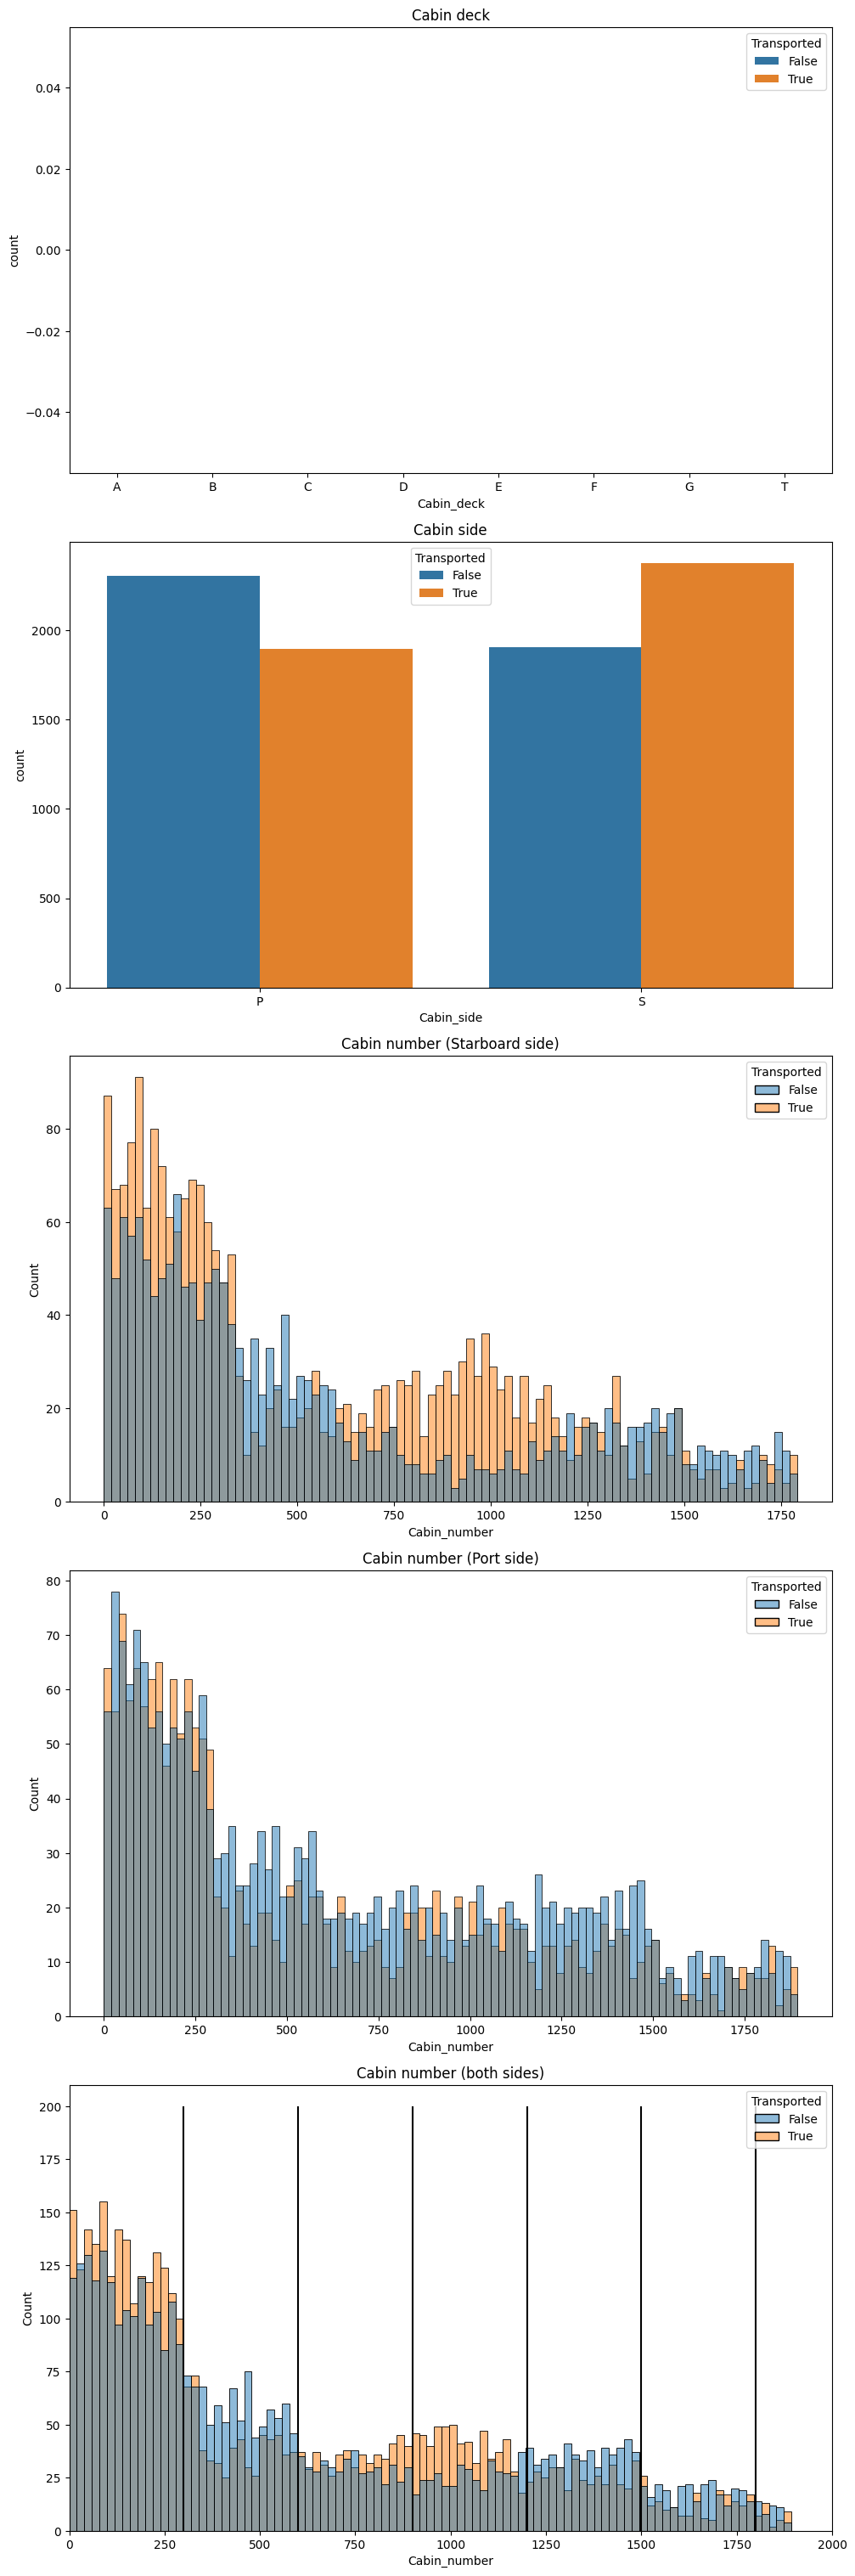

In [422]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,30))
plt.subplot(5,1,1)
sns.countplot(data=df, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(5,1,3)
sns.histplot(
    data=df[df["Cabin_side"] == "S"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (Starboard side)')

plt.subplot(5,1,4)
sns.histplot(
    data=df[df["Cabin_side"] == "P"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (Port side)')

plt.subplot(5,1,2)
sns.countplot(data=df, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

plt.subplot(5,1,5)
sns.histplot(data=df, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number (both sides)')
plt.xlim([0,2000])


we noticed we can aggregate cabin number from both ship sides, now we got a result we can divide into chunks of 300 cabins. This will allow us to compress this feature into categorical feature.

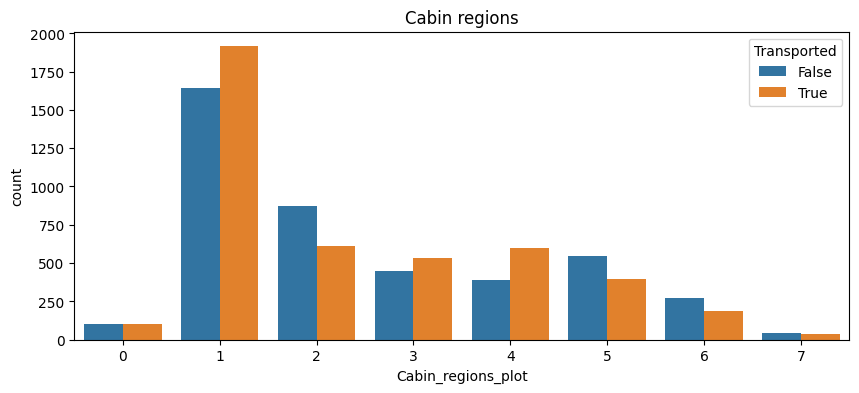

In [423]:
# New features - training set
df['Cabin_region1']=(df['Cabin_number']<300).astype(int)   # one-hot encoding
df['Cabin_region2']=((df['Cabin_number']>=300) & (df['Cabin_number']<600)).astype(int)
df['Cabin_region3']=((df['Cabin_number']>=600) & (df['Cabin_number']<900)).astype(int)
df['Cabin_region4']=((df['Cabin_number']>=900) & (df['Cabin_number']<1200)).astype(int)
df['Cabin_region5']=((df['Cabin_number']>=1200) & (df['Cabin_number']<1500)).astype(int)
df['Cabin_region6']=((df['Cabin_number']>=1500) & (df['Cabin_number']<1800)).astype(int)
df['Cabin_region7']=(df['Cabin_number']>=1800).astype(int)


# Plot distribution of new features
plt.figure(figsize=(10,4))
df['Cabin_regions_plot']=(df['Cabin_region1']+2*df['Cabin_region2']+3*df['Cabin_region3']+4*df['Cabin_region4']+5*df['Cabin_region5']+6*df['Cabin_region6']+7*df['Cabin_region7']).astype(int)
sns.countplot(data=df, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df.drop('Cabin_regions_plot', axis=1, inplace=True)

## Updated Missing Values Plot

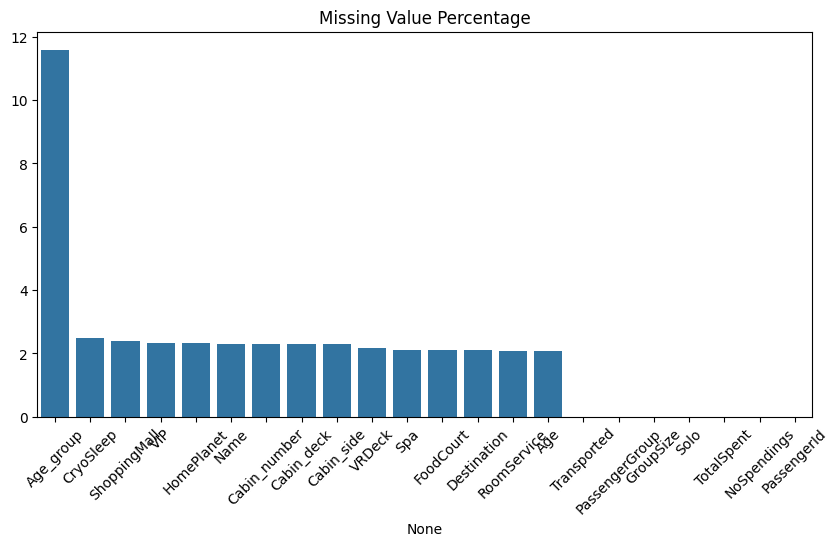

In [ ]:
# Checking which of columns have missing value and its percentage
missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values*100)
plt.xticks(rotation=45)
plt.title("Missing Value Percentage")
plt.show()

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,PassengerGroup,GroupSize,Solo,TotalSpent,NoSpendings,Age_group,Cabin_deck,Cabin_number,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,False,0001,1,True,0.0,True,Age_31-50,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,True,0002,1,True,736.0,False,Age_18-25,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,False,0003,2,False,10383.0,False,Age_51+,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,False,0003,2,False,5176.0,False,Age_31-50,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,True,0004,1,True,1091.0,False,Age_13-17,F,1.0,S


## Fill cabin base on PassengerGroup

In [ ]:
(df['Cabin']).isna().sum()

KeyError: 'Cabin'

In [ ]:
# 1️⃣ Identify groups with exactly one known Cabin
valid_groups = (
    df[df['Cabin'].notna()]
    .groupby('PassengerGroup')['Cabin']
    .nunique()
)

valid_groups = valid_groups[valid_groups == 1].index

# 2️⃣ Fill missing Cabin using PassengerGroup
df.loc[
    df['Cabin'].isna() &
    df['PassengerGroup'].isin(valid_groups),
    'Cabin'
] = (
    df.groupby('PassengerGroup')['Cabin']
      .transform('first')
)

In [ ]:
(df['Cabin']).isna().sum()

112

***

In [ ]:
for d in [df]:
    d[['Deck','CabinNum','Side']] = d['Cabin'].str.split('/', expand=True) # split Cabin to- Deck, CabinNum and Side
    d[['PassengerGroup','PassengerIdNum']] = d['PassengerId'].str.split('_', expand=True) # split PassengerId to- PassengerGroup and PassengerIdNum
    d[['FirstName','LastName']] = d['Name'].str.split(' ', expand=True) # split Name to- FirstName and LastName

# Fill missing values with 'Missing' label
# Cabin has NaN so fillna    
df.fillna({'Deck': 'MissingDeck'}, inplace=True)
df.fillna({'CabinNum': 'MissingCabinNum'}, inplace=True)
df.fillna({'Side': 'MissingSide'}, inplace=True)
# Name has NaN so fillna
df.fillna({'FirstName': 'MissingFirstName'}, inplace=True)
df.fillna({'LastName': 'MissingLastName'}, inplace=True)

df.drop(columns=['Cabin', 'PassengerId', 'Name'], inplace=True)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,GroupSize,Deck,CabinNum,Side,PassengerIdNum,FirstName,LastName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,B,0,P,01,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,F,0,S,01,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,A,0,S,01,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,A,0,S,02,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,F,1,S,01,Willy,Santantines


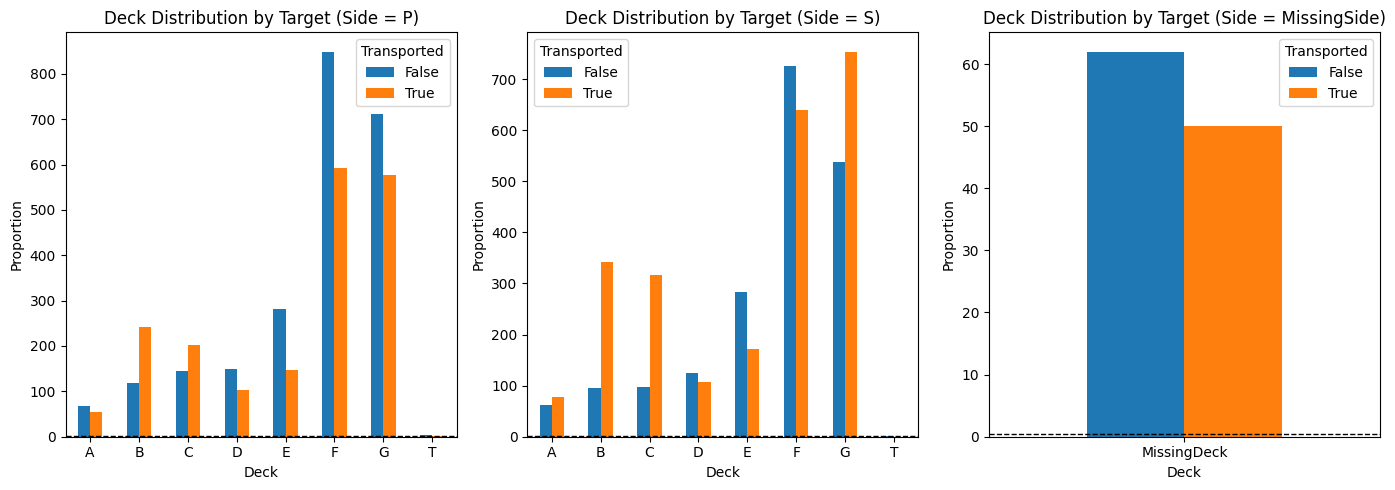

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

for ax, side in zip(axes, ["P", "S", "MissingSide"]):
    df_side = df[df["Side"] == side]
    # Create contingency table of Deck vs Target
    ct = pd.crosstab(
        df_side["Deck"],
        df_side[target],
    )

    ct.plot(
        kind="bar",
        stacked=False,
        ax=ax
    )

    ax.set_title(f"Deck Distribution by Target (Side = {side})")
    ax.set_xlabel("Deck")
    ax.set_ylabel("Proportion")
    ax.axhline(0.5, color="black", linestyle="--", linewidth=1)
    ax.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

From the plots above we can infer couple of things:
1) Cabins 'G' and 'A' have different majority based on the side of the deck; alluding to mix those features.
2) Other Cabins has likely the same majority on each side of the deck; we may want examine mix it.
3) Missing Cabin information rows has equally split; we have no major decision for those with Missing Cabin.

so next, we'll examine the shown of the mixing Deck+Side effect.

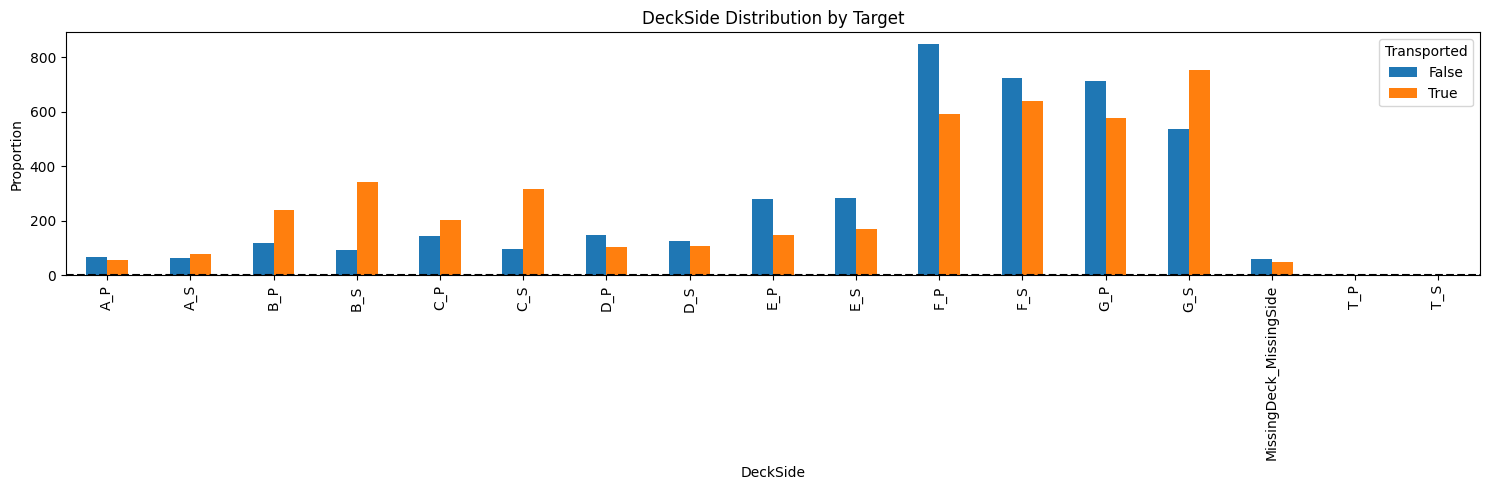

In [ ]:
df["DeckSide"] = df["Deck"] + "_" + df["Side"]

ct = pd.crosstab(
    df["DeckSide"],
    df[target],
)

ct.plot(kind="bar", stacked=False, figsize=(15, 5))
plt.axhline(0.5, color="black", linestyle="--")
plt.ylabel("Proportion")
plt.title("DeckSide Distribution by Target")
plt.tight_layout()
plt.show()

Several decks show opposite tendencies depending on cabin side, such as **Deck B** and **Deck C**, where the **S side** has a higher transported rate than the **P side**. The side dependency indicates the interaction between **Deck** and **Side**, justifying their combination into a single feature.

In [ ]:
df.drop(columns=['Deck', 'Side'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,GroupSize,CabinNum,PassengerIdNum,FirstName,LastName,DeckSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,0,01,Maham,Ofracculy,B_P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,0,01,Juanna,Vines,F_S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,0,01,Altark,Susent,A_S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,0,02,Solam,Susent,A_S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,1,01,Willy,Santantines,F_S


***AI [1]***

In [ ]:
# df['TotalSpending'] = df[spending_cols].sum(axis=1)
# print(df['TotalSpending'].isna().sum())

In [ ]:
# Rows where CryoSleep=True and any spending is non-zero or NaN --> set spending to 0
# Set spending to 0 for these rows
spending_miss_before = df[spending_cols].isna().sum()

df.loc[df['CryoSleep'] == True, spending_cols] = 0

print(spending_miss_before,"\n")
print(df[spending_cols].isna().sum())

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64 

RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
dtype: int64


In [ ]:
# Rows where CryoSleep=NaN if there is any spending non-zero --> CryoSleep=False
# Set CryoSleep to False for these rows
df.loc[df['CryoSleep'].isna() & (df[spending_cols].fillna(0).sum(axis=1) != 0), 'CryoSleep'] = False